In [121]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [122]:
df.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [123]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

### Total Sales By Payment Type

In [124]:
#get sales for all payment types
payment_type_total = df.groupby('payment')[['total']].sum()
payment_type_total

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


### Average Unit Price of Each Product Line

In [125]:
#get average unit price for each product
avg_price = df.groupby('product_line')[['unit_price']].mean().sort_values(ascending=True, by='unit_price')

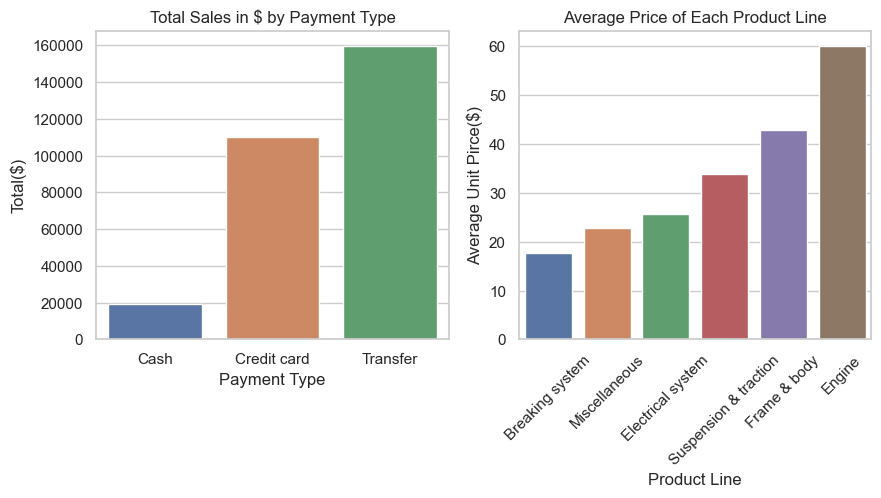

In [155]:
#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

#set fig and axes variables
fig, axes = plt.subplots(1,2, figsize=(10, 4))

#plot the chart
sns.barplot(data=payment_type_total, x=payment_type_total.index, y='total', ax=axes[0])
sns.barplot(data=avg_price, x=avg_price.index, y='unit_price', ax=axes[1])

#add titles and labels to chart
axes[0].set(ylabel='Total($)', xlabel='Payment Type', title='Total Sales in $ by Payment Type')
axes[1].set(ylabel='Average Unit Pirce($)', xlabel='Product Line', title='Average Price of Each Product Line')

#rotate xlabels on 2nd chart
axes[1].tick_params(axis='x', rotation=45)

plt.show()

#### Observation
In regards to payment processing, Transfers had the highest amount of total sales at about 160,000 and was closely followed by Credit Card Payments. Cash was by far the least used payment type and only accounted for about 20,000 of sales.

The average price per unit of each product ranged from around 18-60.The cheapest product by average unit price was the Breaking System product line at around $18, and the most expensive was Engine's around 60.

### Investigating Average Purchase Value by Client Type

In [141]:
#fine average purchase by client type
client_type = df.groupby('client_type')[['total']].mean()

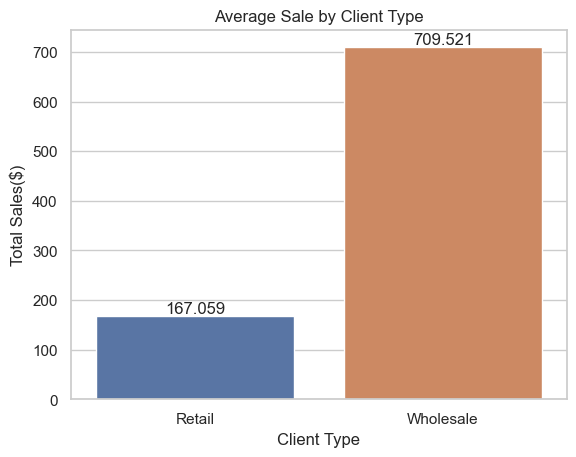

In [154]:
#plot the bar chart
ax = sns.barplot(data=client_type, x=client_type.index, y='total')

#add labels to the charts
ax.set(xlabel='Client Type', ylabel='Total Sales($)', title='Average Sale by Client Type')

#label tops of the bars
for i in ax.containers:
    ax.bar_label(i,)
    
#show the chart
plt.show()

#### Observation
Wholesale clients purchased on average `$709.52` of parts and retail clients purchased on average `$167` of motorcycle parts

## Finding Total Sales by Product Line

In [161]:
#get total sales by product
product_total = df.groupby('product_line')[['total']].sum().sort_values(ascending=True, by='total')
product_total

,total
product_line,
Miscellaneous,27165.82
Engine,37945.38
Breaking system,38350.15
Electrical system,43612.71
Frame & body,69024.73
Suspension & traction,73014.21


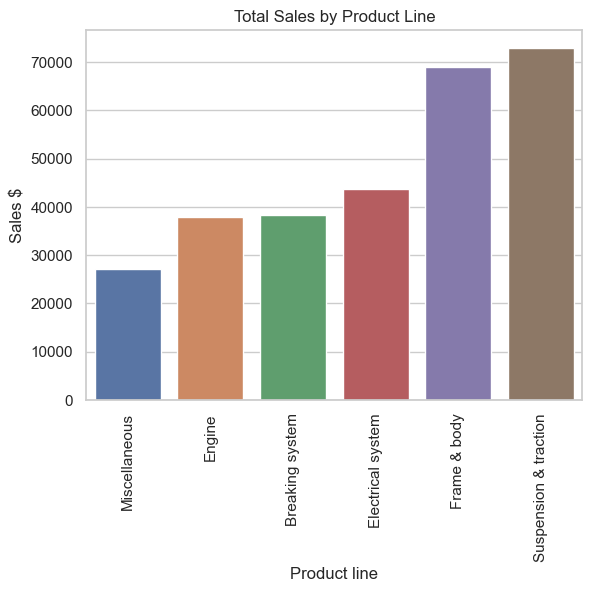

In [173]:
#plot the chart
ax = sns.barplot(data=product_total, x=product_total.index, y='total')

#label chart
ax.set(title='Total Sales by Product Line', ylabel='Sales $', xlabel='Product line')
ax.tick_params(axis='x', rotation=90)

#display the chart
plt.show()

#### Observation
The two highest selling products are Frame & Body and Suspension & Traction.